In [2]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

# Recreate the DataFrame from the provided data
data = {
    'Weight(grams)': [170, 175, 180, 178, 182, 130, 120, 130, 138, 145],
    'Smooth(Range of 1 to 10)': [9, 10, 8, 8, 7, 3, 4, 2, 5, 6],
    'Fruit': [1, 1, 1, 1, 1, 0, 0, 0, 0, 0]
}

df = pd.DataFrame(data)

# Preparing the data for the decision tree
X = df[['Weight(grams)', 'Smooth(Range of 1 to 10)']]
y = df['Fruit']

# Creating and training the decision tree classifier
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X, y)

# Creating new data for prediction
new_data = pd.DataFrame({
    'Weight(grams)': [180, 140, 150],
    'Smooth(Range of 1 to 10)': [7, 8, 5]
})

# Predicting the fruit types for the new data
predictions = clf.predict(new_data)
predictions


array([1, 1, 0], dtype=int64)

In [3]:
pip install pandas scikit-learn openpyxl


Note: you may need to restart the kernel to use updated packages.


In [5]:
import pandas as pd

# Load the diabetes dataset
file_path = 'C:/Users/viina/Downloads/diabetes.xlsx'
diabetes_data = pd.read_excel(file_path)
print(diabetes_data.head())


   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin  Weight  \
0            6      148             72             35        0      40   
1            1       85             66             29        0      44   
2            8      183             64              0        0      90   
3            1       89             66             23       94      74   
4            0      137             40             35      168      45   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [6]:
#Step 2: Find the Correlation Matrix

# Calculate the correlation matrix
correlation_matrix = diabetes_data.corr()
print(correlation_matrix)


                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.129459       0.141282      -0.081672   
Glucose                      0.129459  1.000000       0.152590       0.057328   
BloodPressure                0.141282  0.152590       1.000000       0.207371   
SkinThickness               -0.081672  0.057328       0.207371       1.000000   
Insulin                     -0.073535  0.331357       0.088933       0.436783   
Weight                       0.027202 -0.023913      -0.014865      -0.013205   
DiabetesPedigreeFunction    -0.033523  0.137337       0.041265       0.183928   
Age                          0.544341  0.263514       0.239528      -0.113970   
Outcome                      0.221898  0.466581       0.065068       0.074752   

                           Insulin    Weight  DiabetesPedigreeFunction  \
Pregnancies              -0.073535  0.027202                 -0.033523   
Glucose                   0.331357 -0.023

In [11]:
#Step 3: Split the Dataset into Train and Test Sets

from sklearn.model_selection import train_test_split

# Assuming the target column is named 'Outcome'
target_column = 'Outcome'

# Split the dataset
train_set, test_set = train_test_split(diabetes_data, test_size=0.3, random_state=0)

# Separate features and target
X_train = train_set.drop(columns=[target_column])
y_train = train_set[target_column]
X_test = test_set.drop(columns=[target_column])
y_test = test_set[target_column]


In [13]:

#Step 4: Produce Decision Tree Models
#a. Gini Index
from sklearn.tree import DecisionTreeClassifier

# Train the model using Gini index
clf_gini = DecisionTreeClassifier(criterion='gini', random_state=0)
clf_gini.fit(X_train, y_train)


DecisionTreeClassifier(random_state=0)

In [14]:
#b. Entropy and Information Gain
# Train the model using Entropy
clf_entropy = DecisionTreeClassifier(criterion='entropy', random_state=0)
clf_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [15]:
#Step 5: Apply Prediction Measures

# Predictions using Gini index
y_pred_gini = clf_gini.predict(X_test)

# Predictions using Entropy
y_pred_entropy = clf_entropy.predict(X_test)

In [17]:
#Step 6: Define Accuracy Score Function

from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_curve, auc, precision_recall_curve

# Accuracy Score
def custom_accuracy_score(y_true, y_pred):
    correct_predictions = sum(y_true == y_pred)
    total_predictions = len(y_true)
    accuracy = correct_predictions / total_predictions
    return accuracy, correct_predictions

accuracy_gini, correct_predictions_gini = custom_accuracy_score(y_test, y_pred_gini)
accuracy_entropy, correct_predictions_entropy = custom_accuracy_score(y_test, y_pred_entropy)
print(f'Accuracy (Gini): {accuracy_gini}, Correct Predictions: {correct_predictions_gini}')
print(f'Accuracy (Entropy): {accuracy_entropy}, Correct Predictions: {correct_predictions_entropy}')


Accuracy (Gini): 0.6796536796536796, Correct Predictions: 157
Accuracy (Entropy): 0.7012987012987013, Correct Predictions: 162


In [18]:
#Step 7: Confusion Matrix

# Confusion Matrix
conf_matrix_gini = confusion_matrix(y_test, y_pred_gini)
conf_matrix_entropy = confusion_matrix(y_test, y_pred_entropy)
print(f'Confusion Matrix (Gini):\n{conf_matrix_gini}')
print(f'Confusion Matrix (Entropy):\n{conf_matrix_entropy}')



Confusion Matrix (Gini):
[[116  41]
 [ 33  41]]
Confusion Matrix (Entropy):
[[113  44]
 [ 25  49]]


In [19]:
#Step 8: Calculate Additional Metrics

# Manual calculations from confusion matrix
def calculate_metrics(conf_matrix):
    TN, FP, FN, TP = conf_matrix.ravel()
    accuracy = (TP + TN) / (TP + TN + FP + FN)
    error_rate = 1 - accuracy
    precision = TP / (TP + FP)
    recall = TP / (TP + FN)
    specificity = TN / (TN + FP)
    f1 = 2 * (precision * recall) / (precision + recall)
    return accuracy, error_rate, precision, recall, f1, specificity

metrics_gini = calculate_metrics(conf_matrix_gini)
metrics_entropy = calculate_metrics(conf_matrix_entropy)
print(f'Metrics (Gini): {metrics_gini}')
print(f'Metrics (Entropy): {metrics_entropy}')


Metrics (Gini): (0.6796536796536796, 0.3203463203463204, 0.5, 0.5540540540540541, 0.5256410256410257, 0.7388535031847133)
Metrics (Entropy): (0.7012987012987013, 0.2987012987012987, 0.5268817204301075, 0.6621621621621622, 0.5868263473053892, 0.7197452229299363)


In [20]:
#Step 9: Compare Results

# Compare Gini and Entropy results

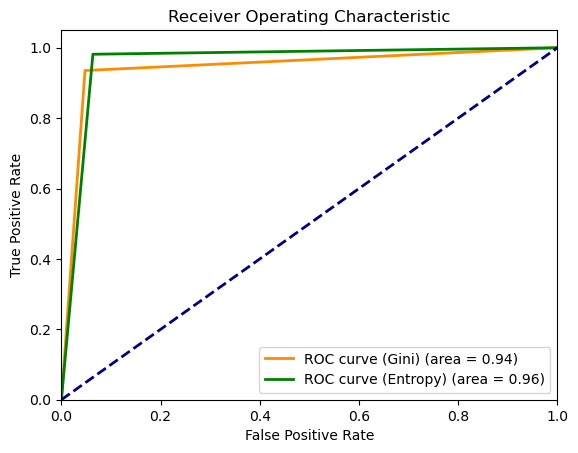

AUC (Gini): 0.9437830687830687
AUC (Entropy): 0.958994708994709


In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

# Load a sample dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train classifiers with Gini and Entropy criteria
clf_gini = DecisionTreeClassifier(criterion='gini', random_state=42)
clf_entropy = DecisionTreeClassifier(criterion='entropy', random_state=42)

clf_gini.fit(X_train, y_train)
clf_entropy.fit(X_train, y_train)

# Predict probabilities for each class
y_pred_proba_gini = clf_gini.predict_proba(X_test)[:, 1]
y_pred_proba_entropy = clf_entropy.predict_proba(X_test)[:, 1]

# Calculate the ROC curve
fpr_gini, tpr_gini, _ = roc_curve(y_test, y_pred_proba_gini)
fpr_entropy, tpr_entropy, _ = roc_curve(y_test, y_pred_proba_entropy)

# Calculate the AUC
auc_gini = roc_auc_score(y_test, y_pred_proba_gini)
auc_entropy = roc_auc_score(y_test, y_pred_proba_entropy)

# Plot ROC curve
plt.figure()
plt.plot(fpr_gini, tpr_gini, color='darkorange', lw=2, label='ROC curve (Gini) (area = %0.2f)' % auc_gini)
plt.plot(fpr_entropy, tpr_entropy, color='green', lw=2, label='ROC curve (Entropy) (area = %0.2f)' % auc_entropy)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Output AUC values
print(f'AUC (Gini): {auc_gini}')
print(f'AUC (Entropy): {auc_entropy}')
